In [ ]:
# http://bit.ly/faupday2

In [1]:
import pandas as pd

d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

In [3]:
# df.loc["index", "col"]
df.loc[1, "col1"]

2

In [4]:
df.loc[1, "col2"] = 44
df

,col1,col2
0,1,3
1,2,44


In [5]:
df["col3"] = [5, 6]
df

,col1,col2,col3
0,1,3,5
1,2,44,6


In [6]:
df[['col1']]

,col1
0,1
1,2


In [7]:
df[['col1','col3']]

,col1,col3
0,1,5
1,2,6


In [8]:
df.loc[2] = [7, 8, 9]
df

,col1,col2,col3
0,1,3,5
1,2,44,6
2,7,8,9


In [10]:
df.loc[3] = ["a", "b", "c"]
df.loc[4] = ["d", True, "f"]
df

,col1,col2,col3
0,1,3,5
1,2,44,6
2,7,8,9
3,a,b,c
4,d,True,f


In [11]:
df.loc[[0, 4, 2], ["col1", "col3"]]

,col1,col3
0,1,5
4,d,f
2,7,9


In [39]:
# ------------------------------------------------------------ #

## Reading a CSV file as a DataFrame

In [13]:
isl = pd.read_csv('/Users/kirangangaraju/Desktop/Python/Football Analytics/isl_data.csv')
isl.head()

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29


In [14]:
# Get summary information of the dataframe
isl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team.name      11 non-null     object
 1   position       11 non-null     int64 
 2   matches        11 non-null     int64 
 3   wins           11 non-null     int64 
 4   losses         11 non-null     int64 
 5   draws          11 non-null     int64 
 6   scoresFor      11 non-null     int64 
 7   scoresAgainst  11 non-null     int64 
 8   points         11 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 920.0+ bytes


In [16]:
# Basic statitical values for each column:
isl.describe().round(1)

,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,6.0,20.0,6.2,6.2,7.6,26.0,26.0,26.2
std,3.3,0.0,3.5,3.1,2.5,5.2,8.6,9.4
min,1.0,20.0,2.0,3.0,4.0,17.0,15.0,12.0
25%,3.5,20.0,3.0,3.5,6.0,22.5,20.5,18.5
50%,6.0,20.0,6.0,6.0,8.0,26.0,23.0,27.0
75%,8.5,20.0,7.5,8.5,9.5,29.5,30.5,32.0
max,11.0,20.0,12.0,12.0,11.0,35.0,44.0,40.0


In [17]:
isl["scoresFor"].sum()

286

In [18]:
# ------------------------------------------------------------ #

## Filtering and Slicing techniques

In [21]:
# Get the information for the 1st ranked team:
# 1st ranked team is on the first row, we can use loc parameter and insert index value directly
isl.loc[0]

team.name        Mumbai City FC
position                      1
matches                      20
wins                         12
losses                        4
draws                         4
scoresFor                    35
scoresAgainst                18
points                       40
Name: 0, dtype: object

In [22]:
# all the times where Position is 1st place
isl["position"] == 1

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: position, dtype: bool

In [26]:
# Let's say that we do not know for sure in which row is the info for the team ranked 1st
# This uncertainity can be easily rectified by replacing the index value with a condition
isl.loc[isl["position"] == 1]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40


In [28]:
isl["scoresFor"] > 25

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7     False
8     False
9     False
10    False
Name: scoresFor, dtype: bool

In [29]:
# Index 0, 1, 2, 3, 4, 6 have scored more than 25 goals
isl.loc[[0, 1, 2, 3, 4, 6]]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
6,Bengaluru FC,7,20,5,8,7,26,28,22


In [33]:
# Now to put them together for all the teams who scored more than 25 goals
isl.loc[isl["scoresFor"] > 25]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
6,Bengaluru FC,7,20,5,8,7,26,28,22


In [34]:
# Now let's obtain only the team name for the same condition as above and not all the columns.
isl.loc[isl["scoresFor"] > 25 , "team.name"]

0        Mumbai City FC
1    ATK Mohun Bagan FC
2      Northeast United
3                FC Goa
4          Hyderabad FC
6          Bengaluru FC
Name: team.name, dtype: object

In [36]:
# We can even put it inside a list:
isl.loc[isl["scoresFor"] > 25, "team.name"].to_list()

['Mumbai City FC',
 'ATK Mohun Bagan FC',
 'Northeast United',
 'FC Goa',
 'Hyderabad FC',
 'Bengaluru FC']

In [38]:
# Now let's look at multiple conditions: 
isl.loc[(isl["scoresFor"] > 25) & (isl["scoresAgainst"] < 25) , "team.name"]

0        Mumbai City FC
1    ATK Mohun Bagan FC
3                FC Goa
4          Hyderabad FC
Name: team.name, dtype: object

In [ ]:
# ------------------------------------------------------------ #

## Add a New Column

In [74]:
# Let's add a column called "Score difference"
# 2 ways to add a new column --> the end of dataframe or a specific location in dataframe
isl["scoresFor"].sub(isl["scoresAgainst"])

0     17
1     13
2      6
3      8
4      8
5     -1
6     -2
7     -6
8    -11
9    -13
10   -19
dtype: int64

In [83]:
isl

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
5,Jamshedpur,6,20,7,7,6,21,22,27
6,Bengaluru FC,7,20,5,8,7,26,28,22
7,Chennaiyin FC,8,20,3,6,11,17,23,20
8,SC East Bengal,9,20,3,9,8,22,33,17
9,Kerala Blasters,10,20,3,9,8,23,36,17


In [84]:
# At the end of the dataframe:
isl["scoreDiff_end"] = isl["scoresFor"].sub(isl["scoresAgainst"])
isl

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points,scoreDiff_end
0,Mumbai City FC,1,20,12,4,4,35,18,40,17
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40,13
2,Northeast United,3,20,8,3,9,31,25,33,6
3,FC Goa,4,20,7,3,10,31,23,31,8
4,Hyderabad FC,5,20,6,3,11,27,19,29,8
5,Jamshedpur,6,20,7,7,6,21,22,27,-1
6,Bengaluru FC,7,20,5,8,7,26,28,22,-2
7,Chennaiyin FC,8,20,3,6,11,17,23,20,-6
8,SC East Bengal,9,20,3,9,8,22,33,17,-11
9,Kerala Blasters,10,20,3,9,8,23,36,17,-13


In [85]:
isl.insert(8, "scoresDiff_index8", isl["scoresFor"].sub(isl["scoresAgainst"]))
isl

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,scoresDiff_index8,points,scoreDiff_end
0,Mumbai City FC,1,20,12,4,4,35,18,17,40,17
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,13,40,13
2,Northeast United,3,20,8,3,9,31,25,6,33,6
3,FC Goa,4,20,7,3,10,31,23,8,31,8
4,Hyderabad FC,5,20,6,3,11,27,19,8,29,8
5,Jamshedpur,6,20,7,7,6,21,22,-1,27,-1
6,Bengaluru FC,7,20,5,8,7,26,28,-2,22,-2
7,Chennaiyin FC,8,20,3,6,11,17,23,-6,20,-6
8,SC East Bengal,9,20,3,9,8,22,33,-11,17,-11
9,Kerala Blasters,10,20,3,9,8,23,36,-13,17,-13


In [86]:
# ------------------------------------------------------------ #

## Plotting

In [87]:
import matplotlib.pyplot as plt

In [88]:
# for giving x-axis/y-axis, we can give it in form of list, range or pandas series
x_axis = [2016, 2017, 2018, 2019, 2020] 
y_axis = [190, 213, 182, 196, 201]

<BarContainer object of 5 artists>

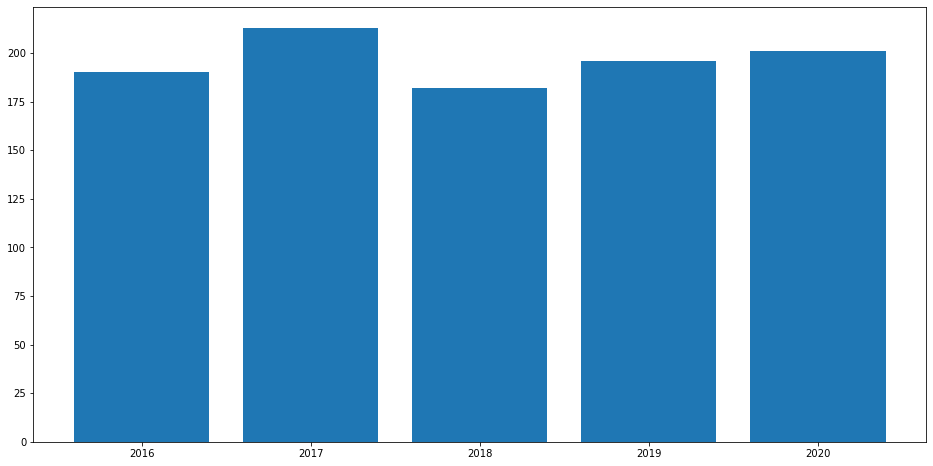

In [93]:
# Bar Graph
plt.figure(figsize=(16, 8))
plt.bar(x_axis, y_axis)

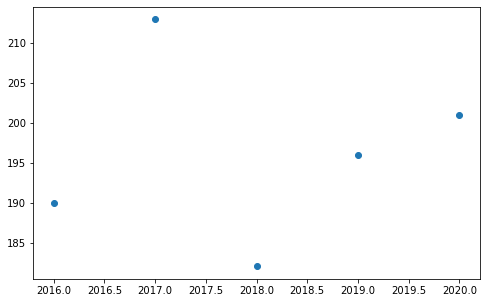

In [95]:
# Scatter Graph
plt.figure(figsize=(8, 5))
plt.scatter(x_axis, y_axis)

([<matplotlib.axis.XTick at 0x7f8bd852c6a0>,
 <a list of 5 Text major ticklabel objects>)

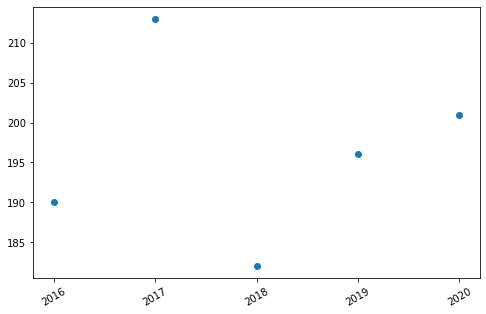

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(x_axis, y_axis)
plt.xticks(x_axis, rotation=30)

In [98]:
# ------------------------------------------------------------ #

### Adding Color to Graphs

<BarContainer object of 5 artists>

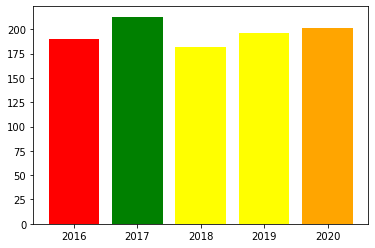

In [99]:
# Color parameter is used to give colors to each bar of bar graph
plt.bar(x_axis, y_axis, color = ["red", "green", "yellow", "yellow", "orange"])

<BarContainer object of 5 artists>

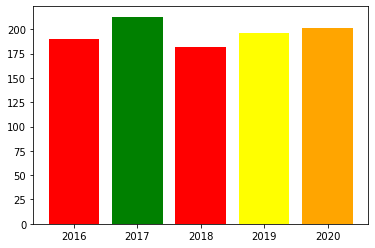

In [101]:
color_list = ["red", "green", "red", "yellow", "orange"]
plt.bar(x_axis, y_axis, color = color_list)

In [108]:
# If the goals are less than 50(red), greater than or equal to 70(green), else yellow 
scored = isl['scoresFor'].to_list()
colors = []
for i in scored:
    if i < 20:
        colors.append("Red")
    elif i > 25:
        colors.append("Green")
    else:
        colors.append("Orange")

colors

['Green',
 'Green',
 'Green',
 'Green',
 'Green',
 'Orange',
 'Green',
 'Red',
 'Orange',
 'Orange',
 'Orange']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

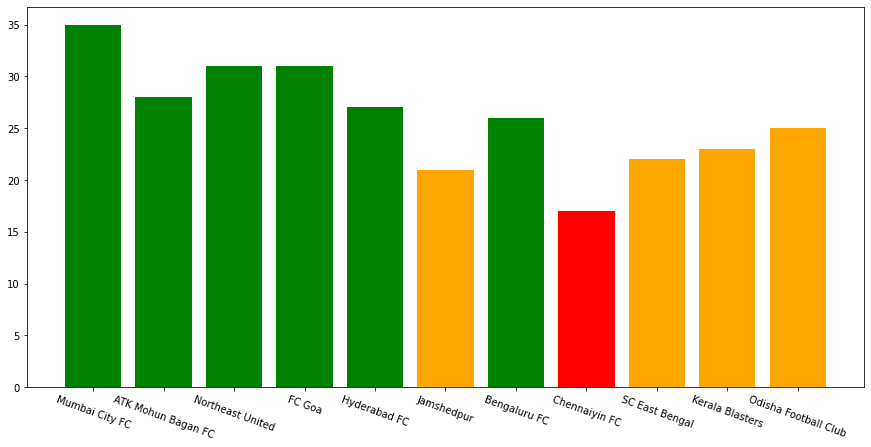

In [129]:
x_scored = isl['team.name'].to_list()
y_scored = isl['scoresFor'].to_list()

plt.figure(figsize=(15, 7))
plt.bar(x_scored, y_scored, color = colors)
plt.xticks(rotation = -20)

In [121]:
# ------------------------------------------------------------ #

## Seaborn Library

In [122]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

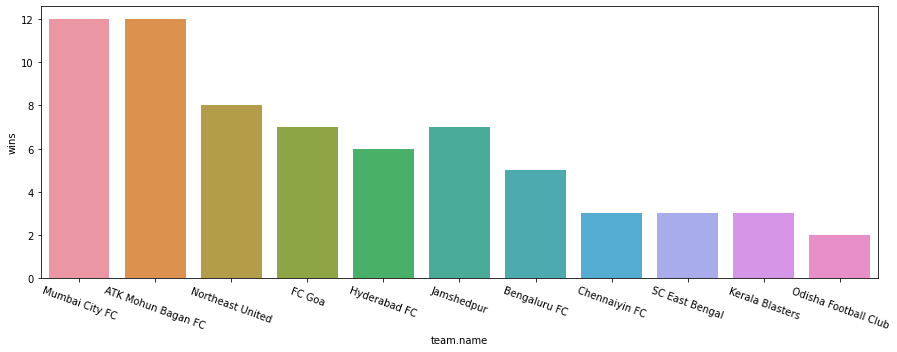

In [130]:
plt.figure(figsize=(15, 5))
sns.barplot(x="team.name", y="wins", data=isl)
plt.xticks(rotation = -20)

Text(0.5, 0, 'Teams')

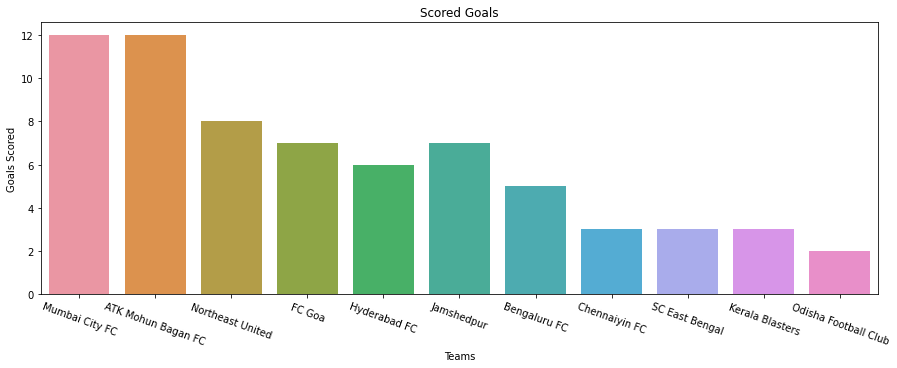

In [132]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="team.name", y="wins", data=isl)
plt.xticks(rotation = -20)
plt.title("Scored Goals")
plt.ylabel("Goals Scored")
plt.xlabel("Teams")

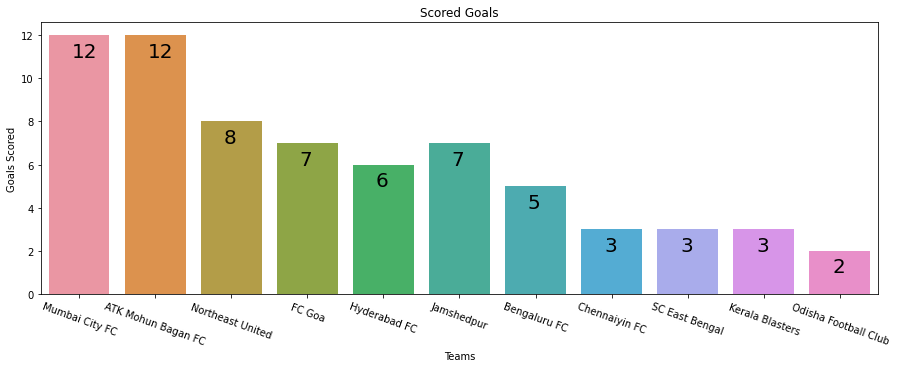

In [134]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="team.name", y="wins", data=isl)
plt.xticks(rotation = -20)
plt.title("Scored Goals")
plt.ylabel("Goals Scored")
plt.xlabel("Teams")

# Let's add some labels to the bars:
for p, label in zip(ax.patches, isl["wins"].values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() - 1), size=20)

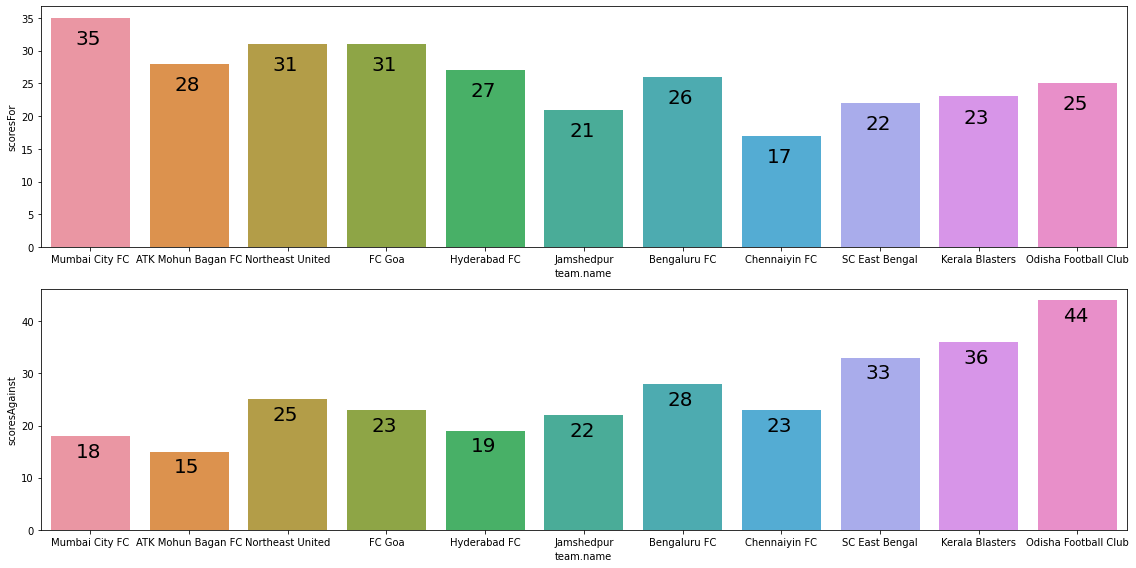

In [135]:
# Bonus Lecture:

fig, ax_sp = plt.subplots(2, 1, figsize=(16, 8))
sns.barplot(data=isl, x="team.name", y="scoresFor", ax=ax_sp[0])
sns.barplot(data=isl, x="team.name", y="scoresAgainst", ax=ax_sp[1])

# Annotate the graph i.e add data labels:
for p, label in zip(ax_sp[0].patches, isl["scoresFor"].values):
    ax_sp[0].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
for p, label in zip(ax_sp[1].patches, isl["scoresAgainst"].values):
    ax_sp[1].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
plt.tight_layout()